<a href="https://colab.research.google.com/github/mseslami/Stock-Trading/blob/master/StockMarketDataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas_datareader import data 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go
import pandas_datareader.data as web


movement shape (27, 502)
company:AMZN, Change:-616.2402954101562
company:AAPL, Change:12.089981079101562
company:WBA, Change:-11.829998016357422
company:NOC, Change:-63.08050537109375
company:BA, Change:6.760162353515625
company:LMT, Change:-103.93986511230469
company:MCD, Change:9.919944763183594
company:INTC, Change:1.0100440979003906
company:NAV, Change:-33.259952545166016
company:IBM, Change:-60.99986267089844
company:TXN, Change:9.060043334960938
company:MA, Change:9.209991455078125
company:MSFT, Change:-14.720012664794922
company:GE, Change:-21.663456916809082
company:AXP, Change:-13.059906005859375
company:PEP, Change:7.080047607421875
company:KO, Change:5.6599884033203125
company:JNJ, Change:13.929946899414062
company:TM, Change:-25.289901733398438
company:HMC, Change:-8.289995193481445
company:MSBHY, Change:-0.05995941162109375
company:SNE, Change:-7.060029983520508
company:XOM, Change:-21.4400634765625
company:CVX, Change:-32.10986328125
company:VLO, Change:-13.64993286132812

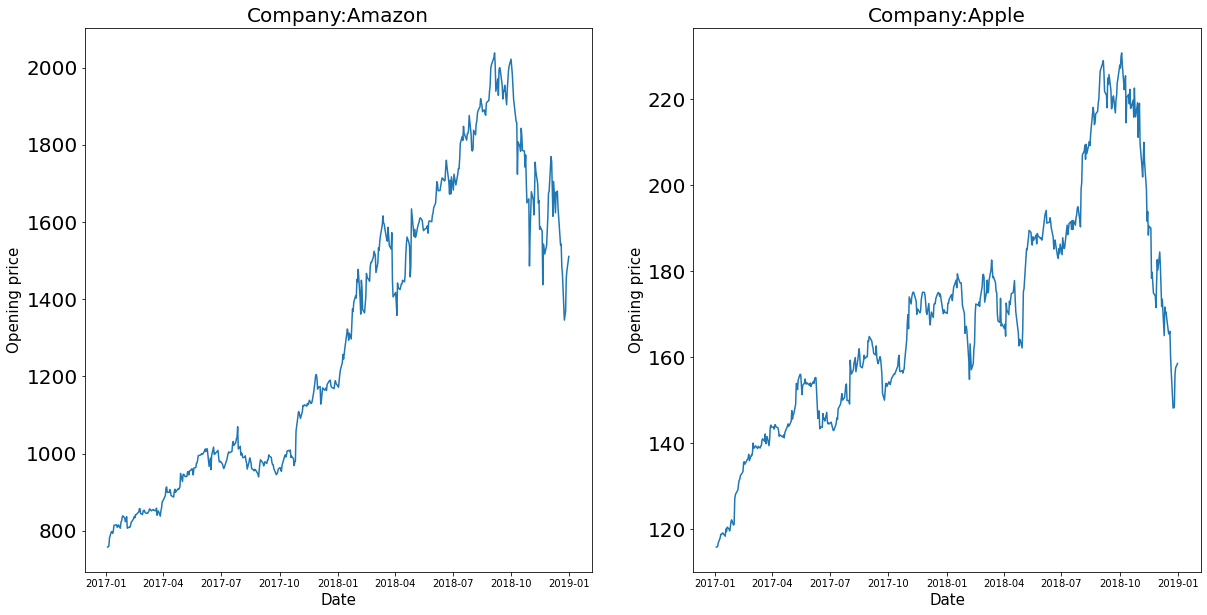

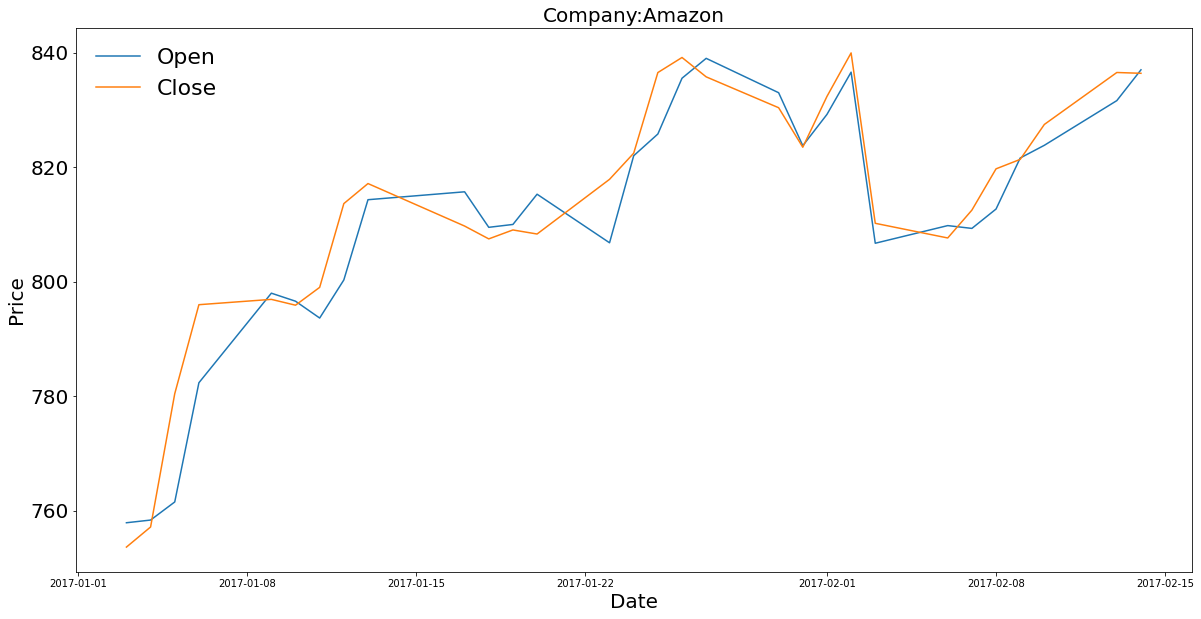

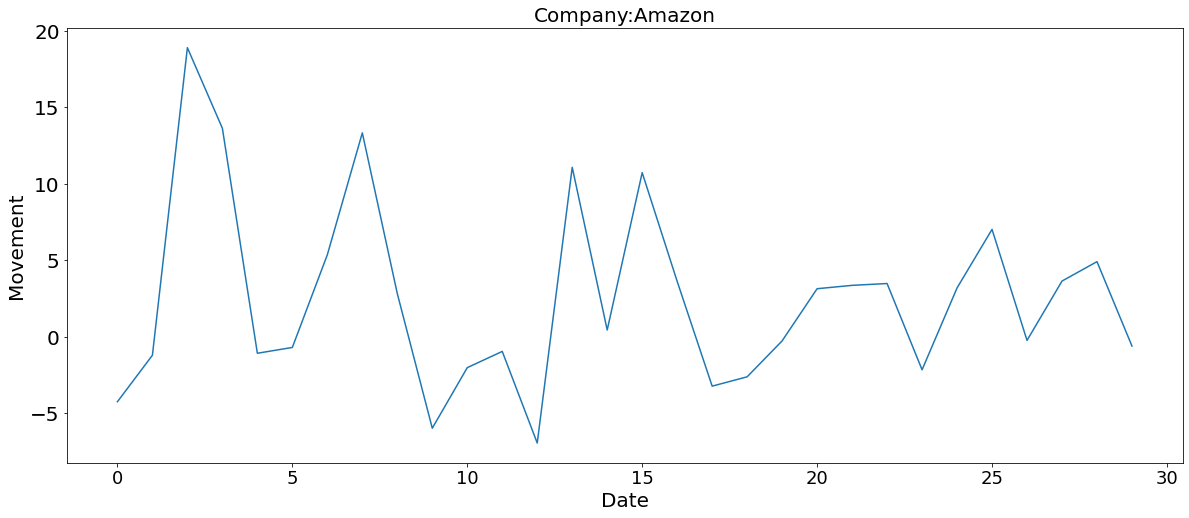

In [ ]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'Navistar':'NAV',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Mistubishi':'MSBHY',
    'Sony':'SNE',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'}


# online source to use
data_source = 'yahoo'

# start and end dates ( in 502 days )
start_date = '2017-01-01'
end_date = '2019-01-01' 

# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
df = web.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

stock_open = np.array(df['Open']).T # stock_open is numpy array of transpose of df['Open']
stock_close = np.array(df['Close']).T # stock_close is numpy array of transpose of df['Close']

movements = stock_close - stock_open
print("movement shape", movements.shape)

sum_of_movement = np.sum(movements,1)

for i in range(len(companies_dict)):
 print('company:{}, Change:{}'.format(df['High'].columns[i],sum_of_movement[i]))




plt.figure(figsize = (20,10)) 
plt.subplot(1,2,1) 
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['AMZN'])
plt.subplot(1,2,2) 
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['AAPL'])

plt.figure(figsize = (20,10)) # Adjusting figure size
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.plot(df.iloc[0:30]['Open']['AMZN'],label = 'Open') # Opening prices of first 30 days are plotted against date
plt.plot(df.iloc[0:30]['Close']['AMZN'],label = 'Close') # Closing prices of first 30 days are plotted against date
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22}) # Properties of legend box

plt.figure(figsize = (20,8)) 
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0][0:30])



In [ ]:

# import Normalizer
from sklearn.preprocessing import Normalizer

normalizer = Normalizer() 
norm_movements = normalizer.fit_transform(movements) 

print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())


-0.39516464170116167
0.30479870737531944
-0.0015126757194284892


In [ ]:

# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# define normalizer
normalizer = Normalizer()

# create a K-means model with 10 clusters
kmeans = KMeans(n_clusters=6, max_iter=1000)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)
pipeline.fit(movements)

# predict cluster labels
labels = pipeline.predict(movements)

# create DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': list(companies_dict.keys())})

# Display df sorted by cluster labels
print(df.sort_values('labels'))



    labels          companies
16       0          Coca Cola
17       0  Johnson & Johnson
6        0          McDonalds
15       0              Pepsi
21       1               Sony
12       1          Microsoft
11       1         MasterCard
10       1  Texas Instruments
0        1             Amazon
1        1              Apple
7        1              Intel
22       2              Exxon
24       2      Valero Energy
23       2            Chevron
5        3    Lockheed Martin
4        3             Boeing
3        3   Northrop Grumman
13       4  General Electrics
18       5             Toyota
19       5              Honda
20       5         Mistubishi
25       5               Ford
9        5                IBM
8        5           Navistar
2        5           Walgreen
14       5   American Express
26       5    Bank of America


Text(0.5, 1.0, 'K-Means clustering with PCA')

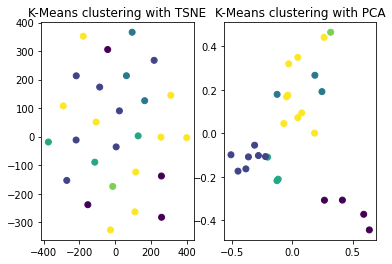

In [ ]:
# visualize the results
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# TSNE
reduced_data = TSNE(n_components = 2).fit_transform(norm_movements)

plt.figure() 
plt.subplot(1,2,1)
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=labels)
plt.title('K-Means clustering with TSNE')

# PCA
reduced_data = PCA(n_components = 2).fit_transform(norm_movements)

plt.subplot(1,2,2) 
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=labels)
plt.title('K-Means clustering with PCA')

